In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans

In [179]:
df = pd.read_csv(r"C:\Users\jiaha\Downloads\starcraft_player_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

Why are there 3 variables typically represented in numbers have type string/object?

In [180]:
df.Age.value_counts()

20    357
21    344
18    325
22    314
19    313
     ... 
40      4
41      3
39      3
43      1
44      1
Name: Age, Length: 29, dtype: int64

In [181]:
df.columns[df.isin(["?"]).any()]

Index(['Age', 'HoursPerWeek', 'TotalHours'], dtype='object')

In [182]:
df[df.isin(["?"]).any(axis = 1)]

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
358,1064,5,17,20,?,94.4724,0.003846,0.000783,3,0.000010,0.000135,0.004474,50.5455,54.9287,3.0972,31,0.000763,7,0.000106,0.000116
1841,5255,5,18,?,?,122.2470,0.006357,0.000433,3,0.000014,0.000257,0.003043,30.8929,62.2933,5.3822,23,0.001055,5,0.000000,0.000338
3340,10001,8,?,?,?,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.000000
3341,10005,8,?,?,?,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.000000
3342,10006,8,?,?,?,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


So the issue is that there is ? values that seem to represent no data and so it happens to be these three columns.

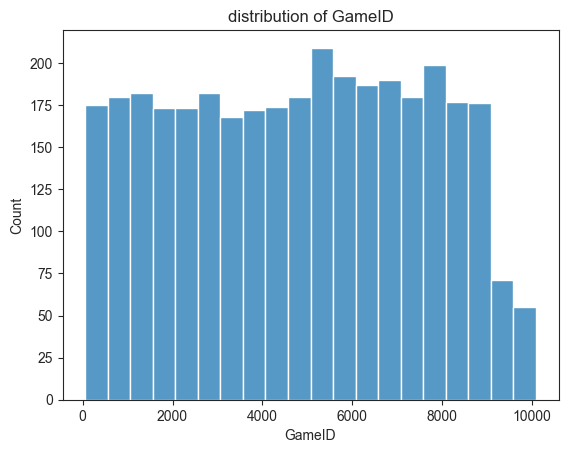

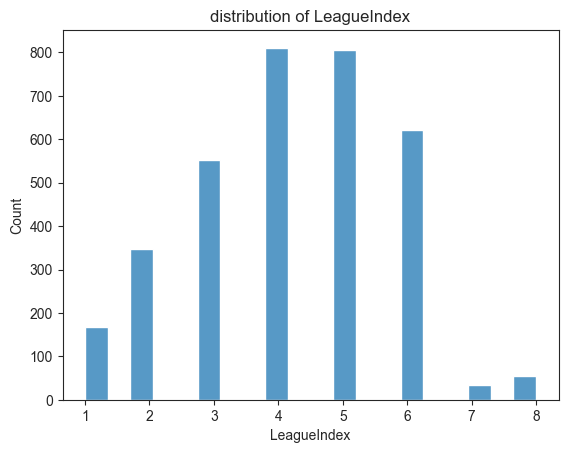

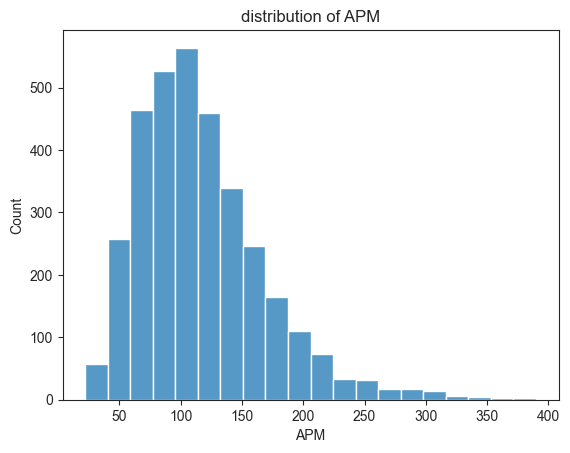

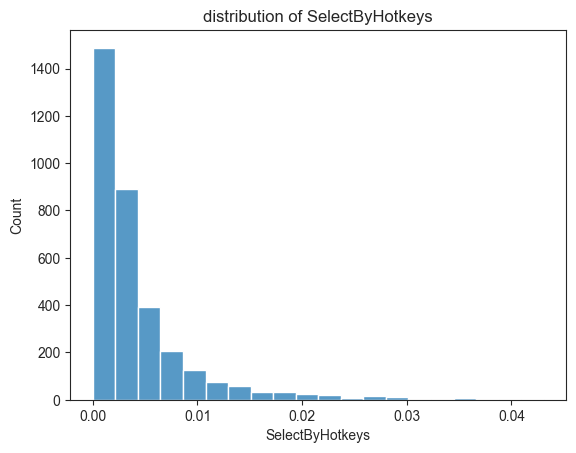

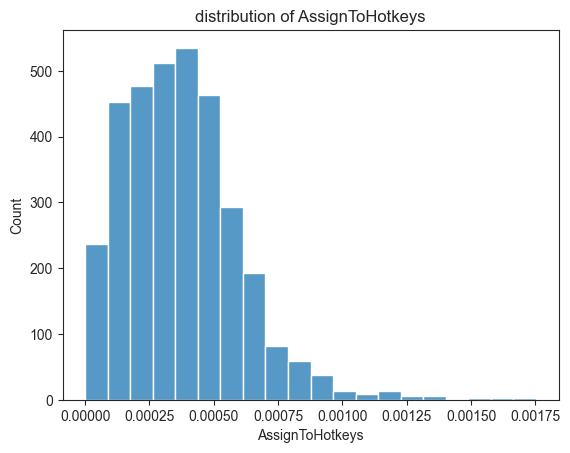

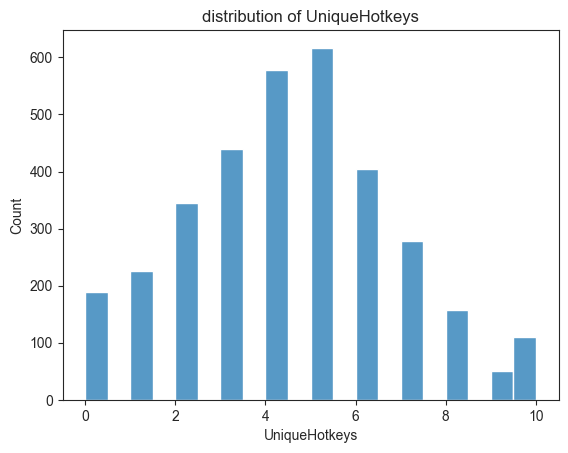

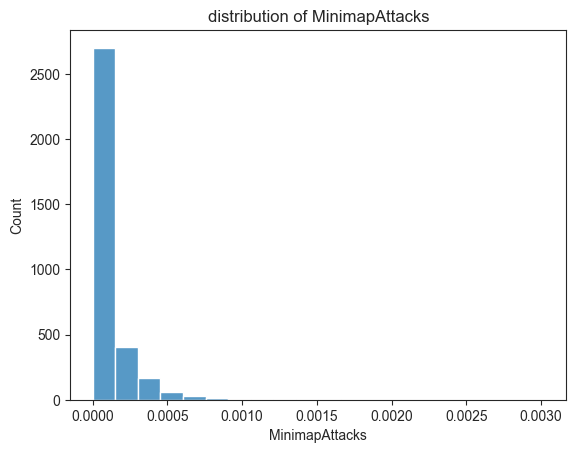

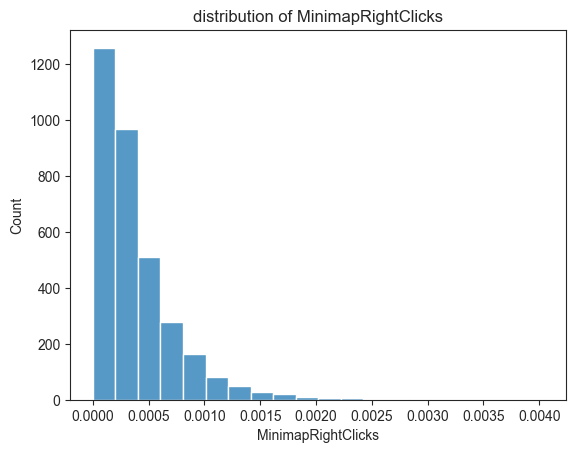

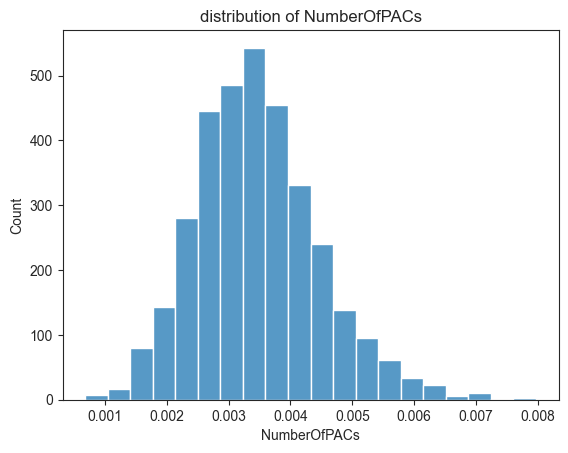

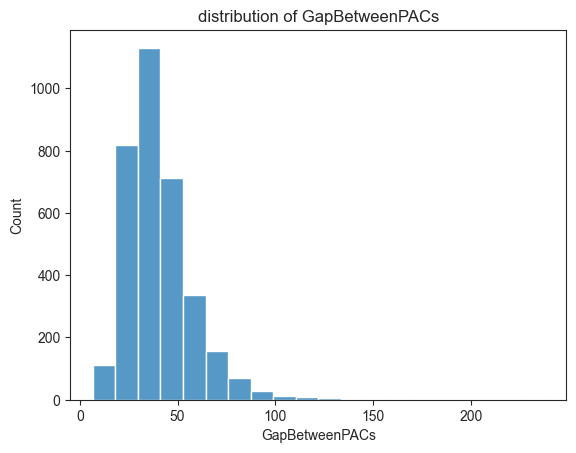

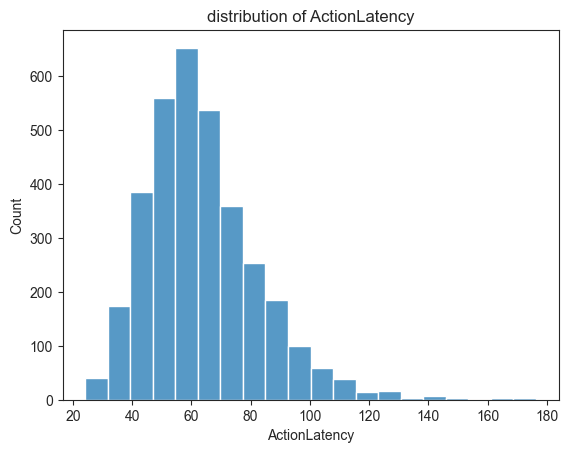

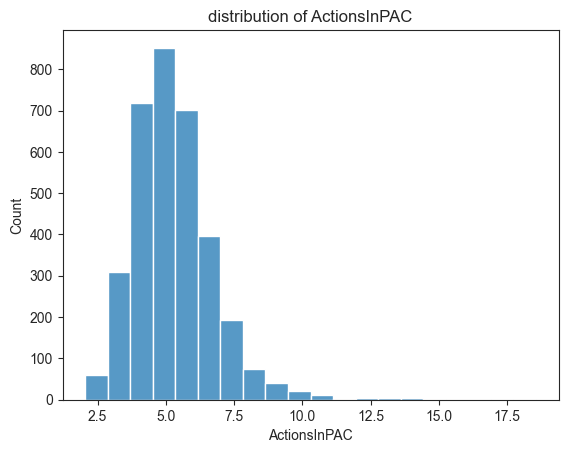

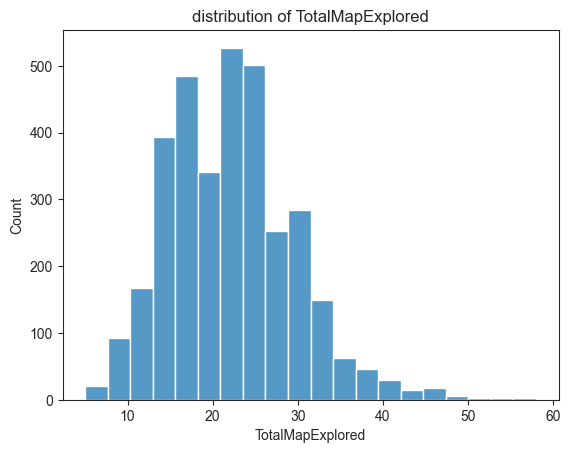

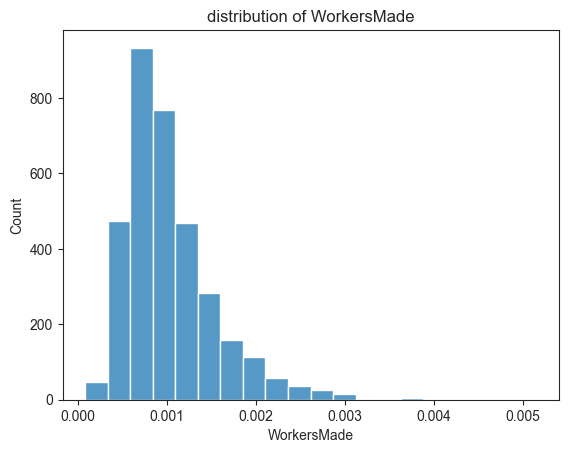

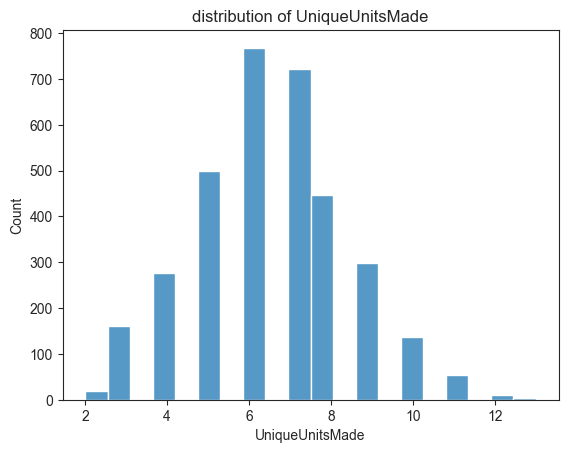

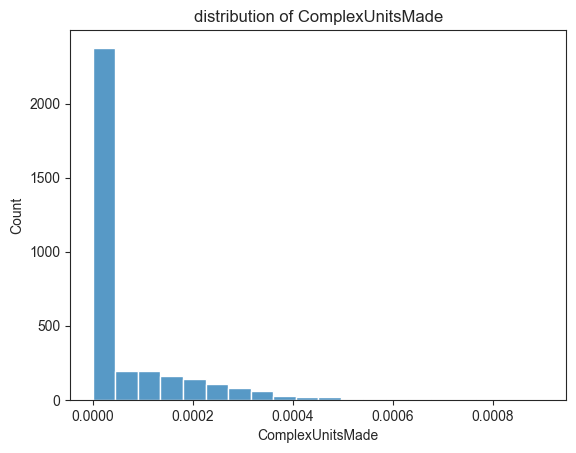

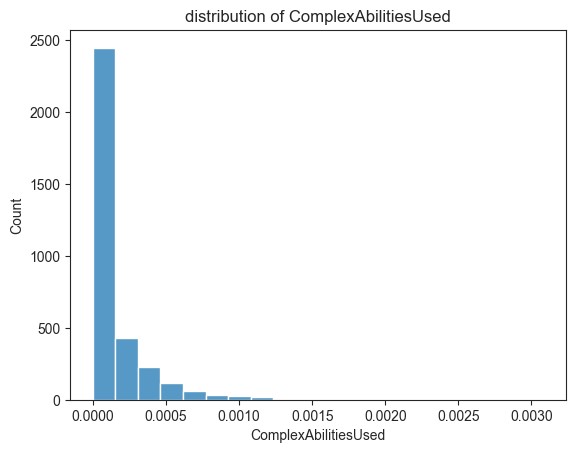

In [183]:
for i in list(df.columns):
    curr = df[i].dtype
    if curr != object:
        plt.title('distribution of ' + i)
        sns.set_style("ticks")
        if curr == int:
            sns.barplot(data = df, x = i)
        else:
            sns.histplot(data = df, x = i, bins=20)
        plt.show()

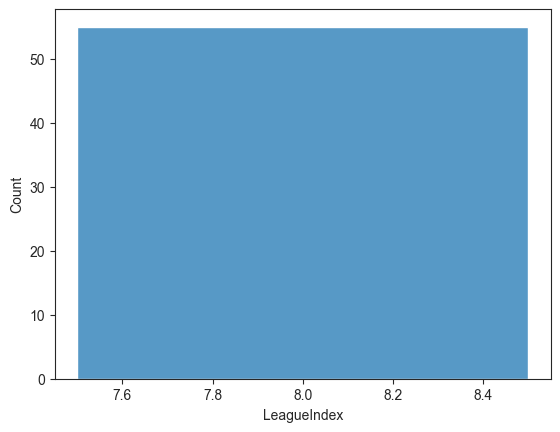

In [184]:
table = df[df.Age == "?"]
sns.histplot(data = table, x = 'LeagueIndex')
plt.show()

All of the ? in age are highest rank. We see earlier there are two people in rank 5 that have some ? as well.

I'm wondering do we really need to focus on any of these three variables?

In [185]:
df[['Age', 'HoursPerWeek', 'TotalHours']] = df[['Age', 'HoursPerWeek', 'TotalHours']].replace("?", np.nan).fillna(-1).astype(float).replace(-1, np.nan)

{'icoord': [[55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [43.75, 43.75, 82.5, 82.5],
  [25.0, 25.0, 63.125, 63.125],
  [15.0, 15.0, 44.0625, 44.0625],
  [5.0, 5.0, 29.53125, 29.53125],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [120.0, 120.0, 152.5, 152.5],
  [17.265625, 17.265625, 136.25, 136.25]],
 'dcoord': [[0.0, 0.1796662691092914, 0.1796662691092914, 0.0],
  [0.0, 0.3878075193635355, 0.3878075193635355, 0.1796662691092914],
  [0.0, 0.4937389103816361, 0.4937389103816361, 0.3878075193635355],
  [0.0, 0.1593072533864761, 0.1593072533864761, 0.0],
  [0.0, 0.49547372348710805, 0.49547372348710805, 0.1593072533864761],
  [0.4937389103816361,
   0.6957098580454839,
   0.6957098580454839,
   0.49547372348710805],
  [0.0, 0.7571849065716005, 0.7571849065716005, 0.69570985804548

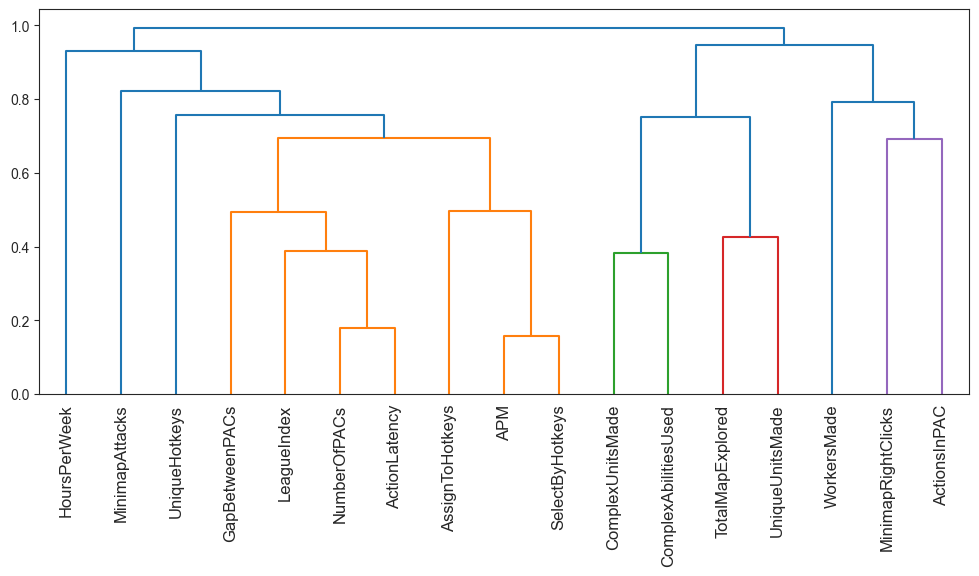

In [186]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
m = df.drop(columns=['GameID', 'Age', 'TotalHours'])
corr = m.corr()
plt.figure(figsize=(12,5))
dissimilarity = 1 - abs(corr)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=m.columns, orientation='top', leaf_rotation=90)

<Axes: >

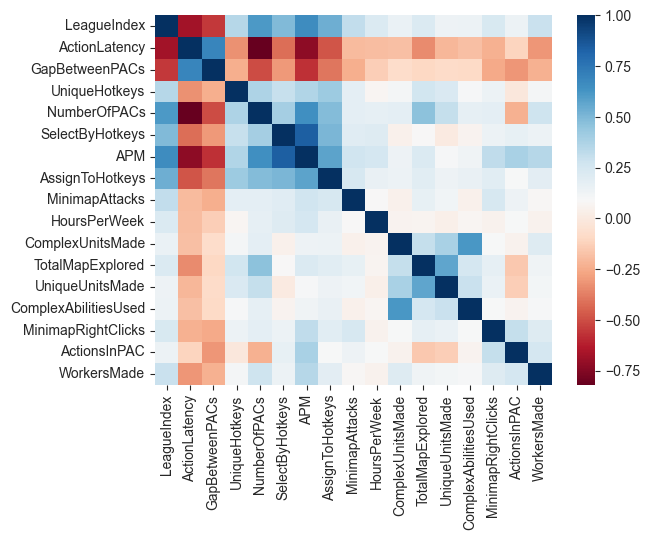

In [187]:
threshold = 0.8
labels = fcluster(Z, threshold, criterion='distance')
labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns
for idx, i in enumerate(m.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(m[i])
    else:
        df_to_append = pd.DataFrame(m[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)

correlations = clustered.corr()
sns.heatmap(correlations, cmap='RdBu')

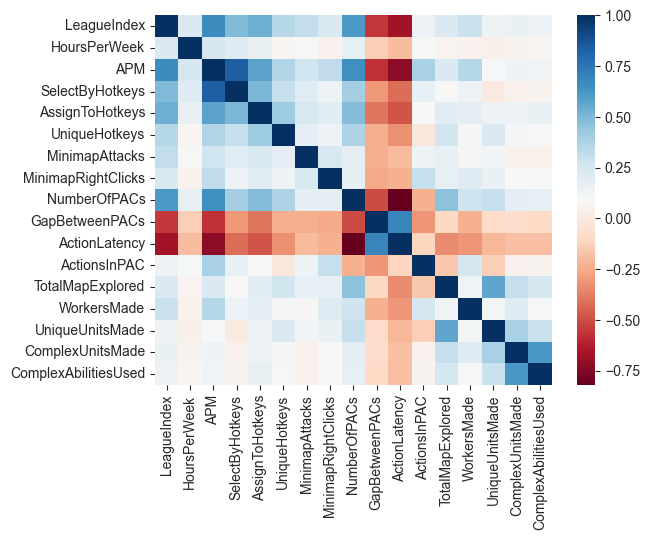

In [188]:
sns.heatmap(m.corr(), annot=False, cmap='RdBu')
plt.show()

Total Hours seems to be relatively uncorrelated with almost every variable in the dataframe.

In [189]:
df.sort_values(by='TotalHours', ascending=False)
df[df.TotalHours > 4000]

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
1,55,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
7,72,7,17.0,42.0,10000.0,212.6022,0.009040,0.000676,6,0.001164,0.001253,0.004952,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249
10,83,3,16.0,16.0,6000.0,153.8010,0.001677,0.000319,4,0.000000,0.000822,0.003772,23.4107,48.0711,7.0044,24,0.001593,7,0.000000,0.000017
14,100,5,16.0,30.0,5000.0,160.4754,0.004254,0.000432,2,0.000775,0.000406,0.004571,36.2897,46.8889,5.4361,28,0.001981,7,0.000000,0.000000
338,1009,5,20.0,40.0,5000.0,84.7086,0.001113,0.000083,2,0.000241,0.000399,0.003124,48.5120,62.6064,4.5585,25,0.001255,7,0.000042,0.000299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,5610,4,22.0,10.0,18000.0,152.2374,0.011983,0.000206,1,0.000016,0.000364,0.003351,52.1896,63.9811,4.9575,19,0.000680,5,0.000000,0.000000
2140,6020,5,22.0,10.0,9000.0,106.0056,0.003569,0.000635,8,0.000946,0.000575,0.003617,28.6645,55.9603,4.6159,25,0.001018,8,0.000000,0.000156
2216,6242,3,24.0,20.0,10260.0,76.5852,0.000780,0.000197,0,0.000063,0.000316,0.002438,42.9480,84.6340,5.9107,27,0.000450,10,0.000246,0.000358
2324,6518,6,20.0,8.0,25000.0,247.0164,0.015794,0.000438,8,0.000308,0.001339,0.004645,17.6471,37.1837,6.5944,29,0.001860,6,0.000000,0.000012


<Axes: >

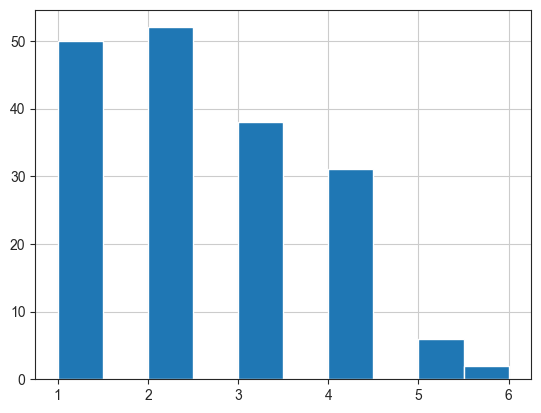

In [190]:
df[df.TotalHours < 100].LeagueIndex.hist()

<Axes: >

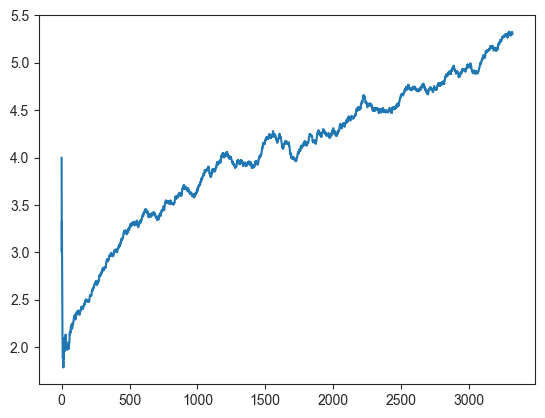

In [191]:
#df[(df.TotalHours > df.HoursPerWeek) & (df.TotalHours < 10000)].sort_values('TotalHours').rolling()

df[(df.TotalHours > df.HoursPerWeek) & (df.TotalHours < 10000)].sort_values('TotalHours')['LeagueIndex'].rolling(window=200, min_periods=1).mean().reset_index(drop=True).plot()

In [192]:
sorted(df[df.HoursPerWeek > 0].TotalHours/df[df.HoursPerWeek > 0].HoursPerWeek, reverse = False)

[0.10714285714285714,
 0.6,
 0.7142857142857143,
 0.8,
 0.8333333333333334,
 0.8928571428571429,
 1.0,
 1.2,
 1.25,
 1.25,
 1.5,
 1.5,
 1.5625,
 1.6666666666666667,
 2.0,
 2.0,
 2.0833333333333335,
 2.0833333333333335,
 2.142857142857143,
 2.2222222222222223,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.7777777777777777,
 3.0,
 3.0,
 3.0952380952380953,
 3.2142857142857144,
 3.25,
 3.3333333333333335,
 3.3333333333333335,
 3.5,
 3.5714285714285716,
 3.5714285714285716,
 3.5714285714285716,
 3.5714285714285716,
 3.75,
 3.75,
 3.75,
 3.75,
 3.75,
 3.75,
 3.75,
 4.0,
 4.0,
 4.166666666666667,
 4.166666666666667,
 4.166666666666667,
 4.166666666666667,
 4.285714285714286,
 4.333333333333333,
 4.375,
 4.583333333333333,
 4.642857142857143,
 4.761904761904762,
 4.761904761904762,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.125,
 5.357142857142857,
 5.555555555555555,
 5.625,
 5.714285714285714,
 5.714285714285714,
 5.714285714285714,
 6.0,
 6.0,
 6.25,
 6.25,
 6.25,


<Axes: >

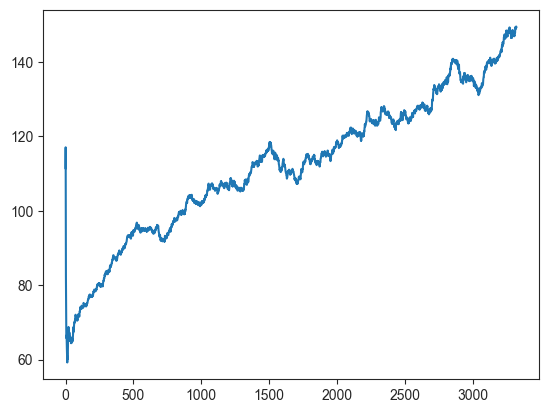

In [193]:
df[(df.TotalHours > df.HoursPerWeek) & (df.TotalHours < 10000)].sort_values('TotalHours')['APM'].rolling(window=200, min_periods=1).mean().reset_index(drop=True).plot()

In [194]:
data = df[(df.TotalHours > df.HoursPerWeek) & (df.TotalHours < 10000)].drop(columns = ['GameID', 'Age', 'HoursPerWeek'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
for i in range(1, 7):
    pca = PCA(n_components=i)
    components = pca.fit_transform(scaled_data)
    print(i)
    print(pca.explained_variance_ratio_.sum() * 100)

1
31.63857997362535
2
43.86090213758671
3
52.79119365152655
4
59.439595216547545
5
65.42208550287371
6
70.96168241310163


In [195]:
pd.DataFrame(scaled_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.605174,4.315594,0.608539,-0.105655,-0.688196,1.151620,0.101759,0.033041,1.467362,-0.471587,-1.227144,-0.344865,0.790732,0.701790,-0.292707,-0.538981,-0.534525
1,0.605174,7.971458,0.306110,-0.150586,-0.498857,-0.135956,1.266623,0.144684,0.904925,-0.456707,-1.149259,-0.283152,-0.016819,0.311546,-0.830658,-0.538981,0.245677
2,-0.087377,-0.802615,-0.931327,-0.618864,-0.136461,-0.135956,1.263888,0.225309,-0.528544,0.236646,0.590098,-0.816582,-0.016819,-0.551083,-0.292707,-0.538981,0.174975
3,-0.779928,-0.437029,-0.145485,-0.633224,-0.719603,-1.423532,-0.255990,0.453494,0.360606,-0.675394,-0.549099,-0.235100,-0.420594,-1.162772,0.245245,-0.538981,0.907252
4,-0.779928,-0.254236,0.173717,-0.611439,-0.175718,-0.994340,-0.592884,2.638378,-1.107049,-1.061547,-0.109320,2.736286,-0.958962,0.275039,-1.368610,-0.538981,-0.462154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,-0.087377,-0.437029,0.909616,2.087068,0.667764,1.151620,0.782154,-0.187346,0.154019,-0.250996,0.111490,-0.505547,1.059916,0.006999,0.245245,-0.538981,0.544346
3317,0.605174,1.573696,1.494043,0.624687,-0.020182,0.722428,-0.067549,-0.596328,2.053361,-1.051319,-1.549919,-0.224837,2.136650,0.598801,0.245245,-0.538981,0.922663
3318,-0.087377,-0.985408,0.148839,-0.224530,-0.587438,1.580812,-0.246725,-0.479830,0.264053,-0.299220,-0.326561,0.098060,0.117773,1.889046,0.245245,-0.538981,-0.534525
3319,-0.779928,-0.437029,0.411597,0.300040,-0.869369,0.293236,-0.592884,0.277239,-0.238966,-1.321422,-0.089286,0.501132,-0.555186,-0.186701,-0.830658,-0.538981,-0.534525


In [196]:
df.groupby('LeagueIndex').mean()

,GameID,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
LeagueIndex,,,,,,,,,,,,,,,,,,,
1,4427.359281,22.724551,13.125749,264.191617,59.539277,0.001081,0.000185,3.215569,0.000028,0.000208,0.002363,65.654987,95.404977,4.548287,18.730539,0.000626,5.826347,0.000015,0.000042
2,4668.334294,22.155620,13.296830,331.409222,74.780917,0.001536,0.000222,3.351585,0.000045,0.000276,0.002650,53.788886,81.270053,5.005949,19.824207,0.000801,6.074928,0.000024,0.000076
3,4725.052441,22.050633,13.949367,493.792043,89.971260,0.002188,0.000282,3.687161,0.000056,0.000332,0.002976,46.143882,73.697301,5.163282,20.506329,0.000919,6.368897,0.000045,0.000117
4,4715.130703,21.981504,14.022195,588.006165,105.847166,0.003150,0.000340,3.971640,0.000075,0.000368,0.003310,41.041426,64.793765,5.236971,22.019729,0.001006,6.573366,0.000065,0.000138
5,4704.777916,21.362283,16.183851,2024.493781,131.520718,0.004980,0.000414,4.699752,0.000115,0.000426,0.003744,34.726473,56.085007,5.468031,23.075682,0.001168,6.699752,0.000076,0.000176
6,4843.792271,20.677939,21.088567,988.405797,158.683211,0.007437,0.000512,5.521739,0.000156,0.000473,0.004231,30.207895,48.947837,5.475560,24.307568,0.001211,6.869565,0.000077,0.000182
7,4683.771429,21.171429,31.714286,1581.028571,189.555686,0.009418,0.000723,6.771429,0.000340,0.000570,0.005111,22.978160,40.342903,5.226089,28.028571,0.001238,7.028571,0.000082,0.000267
8,10051.509091,NaN,NaN,NaN,267.341236,0.020981,0.000937,7.345455,0.000376,0.000831,0.005237,18.969773,35.390153,5.676727,22.854545,0.001077,6.127273,0.000026,0.000135


In [197]:
df[df.TotalHours.astype(str).str.endswith(('00.0'))].groupby('TotalHours').agg(['mean', 'count'])

GameID       LeagueIndex              Age       HoursPerWeek  \
                   mean count        mean count       mean count         mean   
TotalHours                                                                      
100.0       4486.543103   116    2.827586   116  21.706897   116    10.655172   
200.0       4477.666667   168    3.440476   168  22.166667   168    10.702381   
300.0       4683.391089   202    3.618812   202  22.113861   202    11.287129   
400.0       4867.990610   213    3.915493   213  21.802817   213    13.042254   
500.0       4864.567073   328    4.121951   328  22.079268   328    13.225610   
...                 ...   ...         ...   ...        ...   ...          ...   
10000.0       72.000000     1    7.000000     1  17.000000     1    42.000000   
18000.0     5610.000000     1    4.000000     1  22.000000     1    10.000000   
20000.0     2246.000000     1    5.000000     1  22.000000     1    16.000000   
25000.0     6518.000000     1    6.000000     1  20.000000     1     8.000000   
1000000.0   5140.000000     1    5.000000     1  18.000000     1    24.000000   

                         APM        ... TotalMapExplored       WorkersMade  \
           count        mean count  ...             mean count        mean   
TotalHours                          ...                                      
100.0        116   81.978727   116  ...        19.422414   116    0.000878   
200.0        168   95.775585   168  ...        21.029762   168    0.000929   
300.0        202  102.557213   202  ...        22.029703   202    0.000958   
400.0        213  106.433856   213  ...        21.596244   213    0.001010   
500.0        328  111.452224   328  ...        22.103659   328    0.001046   
...          ...         ...   ...  ...              ...   ...         ...   
10000.0        1  212.602200     1  ...        45.000000     1    0.002277   
18000.0        1  152.237400     1  ...        19.000000     1    0.000680   
20000.0        1  248.049000     1  ...        21.000000     1    0.001526   
25000.0        1  247.016400     1  ...        29.000000     1    0.001860   
1000000.0      1  281.424600     1  ...        29.000000     1    0.001328   

                 UniqueUnitsMade       ComplexUnitsMade        \
           count            mean count             mean count   
TotalHours                                                      
100.0        116        5.887931   116         0.000044   116   
200.0        168        6.410714   168         0.000052   168   
300.0        202        6.435644   202         0.000072   202   
400.0        213        6.577465   213         0.000059   213   
500.0        328        6.603659   328         0.000053   328   
...          ...             ...   ...              ...   ...   
10000.0        1        9.000000     1         0.000129     1   
18000.0        1        5.000000     1         0.000000     1   
20000.0        1        6.000000     1         0.000000     1   
25000.0        1        6.000000     1         0.000000     1   
1000000.0      1        6.000000     1         0.000000     1   

           ComplexAbilitiesUsed        
                           mean count  
TotalHours                             
100.0                  0.000115   116  
200.0                  0.000130   168  
300.0                  0.000160   202  
400.0                  0.000119   213  
500.0                  0.000130   328  
...                         ...   ...  
10000.0                0.000249     1  
18000.0                0.000000     1  
20000.0                0.000000     1  
25000.0                0.000012     1  
1000000.0              0.000000     1  

[37 rows x 38 columns]

In [198]:
pd.set_option('display.max_rows', None)
df[(~df.TotalHours.astype(str).str.endswith(('0.0'))) & (~df.TotalHours.astype(str).str.endswith(('00.0')))].groupby('TotalHours').agg(['mean'])

,GameID,LeagueIndex,Age,HoursPerWeek,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
TotalHours,,,,,,,,,,,,,,,,,,,
3.0,2829.000000,3.000000,16.000000,28.000000,69.574800,0.001016,0.000371,3.000000,0.000000,0.000239,0.003623,57.377500,69.438900,3.323400,18.000000,0.000550,7.000000,0.000000,0.000490
7.0,1207.000000,4.000000,16.000000,2.000000,111.358200,0.004802,0.000150,0.000000,0.000060,0.000360,0.002551,64.238100,71.811800,6.200000,17.000000,0.001531,4.000000,0.000000,0.000000
12.0,6184.000000,1.500000,22.000000,11.000000,43.503900,0.000876,0.000154,3.750000,0.000006,0.000183,0.002391,75.976375,97.784425,3.168325,22.500000,0.000528,6.500000,0.000000,0.000016
16.0,5326.000000,1.000000,20.000000,20.000000,73.259400,0.000954,0.000136,5.000000,0.000000,0.000099,0.003866,52.810300,69.435900,3.298100,21.000000,0.000694,6.000000,0.000000,0.000000
21.0,8460.000000,4.000000,18.000000,14.000000,83.591400,0.002615,0.000272,4.000000,0.000030,0.000050,0.003530,34.274300,65.310500,3.769200,20.000000,0.000764,7.000000,0.000000,0.000000
24.0,5369.000000,1.500000,18.000000,4.000000,59.496600,0.000487,0.000160,5.000000,0.000024,0.000040,0.002424,59.534350,89.285900,4.529150,15.500000,0.000756,5.500000,0.000048,0.000058
25.0,3959.000000,2.750000,20.000000,9.500000,92.377650,0.001593,0.000183,3.000000,0.000037,0.000477,0.003070,45.878600,62.291200,5.684225,23.250000,0.000611,4.250000,0.000000,0.000007
26.0,1433.000000,2.000000,18.000000,8.000000,94.550400,0.001143,0.000110,2.000000,0.000030,0.000682,0.002637,40.519100,71.908700,6.787100,25.000000,0.001002,6.000000,0.000190,0.001474


In [199]:
pd.set_option('display.max_rows', 10)
df[df.HoursPerWeek > 75]


,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
237,711,5,17.0,96.0,900.0,145.8060,0.010374,0.000596,4,0.000000,0.000030,0.003965,43.2906,54.4060,4.3008,21,0.001014,8,0.000000,0.000104
690,2000,6,16.0,168.0,1260.0,233.3058,0.017521,0.000744,10,0.000178,0.000235,0.005137,25.5962,38.9165,5.0961,43,0.001027,10,0.000315,0.000502
895,2606,6,22.0,84.0,800.0,250.2990,0.024904,0.001192,10,0.000222,0.000344,0.004445,28.0091,43.1273,5.1636,28,0.000849,7,0.000000,0.000717
1280,3733,6,24.0,112.0,1500.0,139.7598,0.005748,0.000368,4,0.000213,0.000155,0.005011,24.6822,41.8956,4.1489,28,0.000756,5,0.000000,0.000000
1299,3768,5,22.0,90.0,1000.0,89.6652,0.001847,0.000360,5,0.000172,0.000297,0.002551,37.2099,71.6074,5.8834,13,0.000986,5,0.000094,0.000031
1654,4754,7,18.0,98.0,700.0,236.0316,0.015664,0.001015,10,0.000366,0.001632,0.006487,18.7787,29.9871,4.3371,25,0.001507,8,0.000000,0.000000
1677,4817,6,21.0,140.0,1800.0,197.7774,0.006001,0.000383,4,0.000308,0.001307,0.004445,29.9962,42.8764,7.0019,32,0.001365,11,0.000058,0.000350
1796,5147,4,22.0,84.0,640.0,149.6574,0.003935,0.000521,3,0.000000,0.000046,0.004074,29.0142,46.9886,5.9886,27,0.001377,6,0.000243,0.001007
2159,6074,3,18.0,80.0,200.0,146.5200,0.006215,0.000393,4,0.000049,0.000147,0.002899,35.4872,64.8136,7.3983,11,0.000442,3,0.000000,0.000000
2662,7435,4,34.0,96.0,400.0,56.8584,0.000059,0.000029,1,0.000029,0.000265,0.001530,47.6078,129.8462,6.9038,11,0.000765,5,0.000000,0.000000


In [216]:
df[df.HoursPerWeek == 168].drop(columns= ['GameID', 'HoursPerWeek'])

,LeagueIndex,Age,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
690,6,16.0,1260.0,233.3058,0.017521,0.000744,10,0.000178,0.000235,0.005137,25.5962,38.9165,5.0961,43,0.001027,10,0.000315,0.000502


In [223]:
from scipy.spatial.distance import euclidean

scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
weight = 50

scaled_df['TotalHours'] = scaled_df['TotalHours'] * weight

df1 = scaled_df.drop(columns= ['GameID']).dropna()

specific_row = scaled_df.drop(columns= ['GameID']).iloc[690]

distances = df1.apply(lambda row: euclidean(row, specific_row), axis=1)

most_similar_indices = distances.nsmallest(10).index

most_similar_rows = df.loc[most_similar_indices]
s
most_similar_rows


,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
690,2000,6,16.0,168.0,1260.0,233.3058,0.017521,0.000744,10,0.000178,0.000235,0.005137,25.5962,38.9165,5.0961,43,0.001027,10,0.000315,0.000502
1677,4817,6,21.0,140.0,1800.0,197.7774,0.006001,0.000383,4,0.000308,0.001307,0.004445,29.9962,42.8764,7.0019,32,0.001365,11,0.000058,0.000350
1280,3733,6,24.0,112.0,1500.0,139.7598,0.005748,0.000368,4,0.000213,0.000155,0.005011,24.6822,41.8956,4.1489,28,0.000756,5,0.000000,0.000000
237,711,5,17.0,96.0,900.0,145.8060,0.010374,0.000596,4,0.000000,0.000030,0.003965,43.2906,54.4060,4.3008,21,0.001014,8,0.000000,0.000104
895,2606,6,22.0,84.0,800.0,250.2990,0.024904,0.001192,10,0.000222,0.000344,0.004445,28.0091,43.1273,5.1636,28,0.000849,7,0.000000,0.000717
1654,4754,7,18.0,98.0,700.0,236.0316,0.015664,0.001015,10,0.000366,0.001632,0.006487,18.7787,29.9871,4.3371,25,0.001507,8,0.000000,0.000000
2624,7351,6,18.0,70.0,1200.0,202.3992,0.007781,0.000624,6,0.000261,0.000873,0.005263,32.7084,39.1379,5.7866,37,0.001690,8,0.000408,0.001191
1796,5147,4,22.0,84.0,640.0,149.6574,0.003935,0.000521,3,0.000000,0.000046,0.004074,29.0142,46.9886,5.9886,27,0.001377,6,0.000243,0.001007
26,144,6,18.0,70.0,2520.0,267.5586,0.027815,0.000708,10,0.000000,0.000128,0.005616,34.6035,40.6025,4.1629,36,0.000856,12,0.000089,0.000197
1209,3473,6,19.0,70.0,600.0,95.0328,0.003195,0.000462,2,0.000231,0.000195,0.003714,47.1302,59.1646,4.1245,37,0.000699,10,0.000231,0.000390
